In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Loading data from csv file into a dataframe

In [3]:
# Importing the dataset
dataset = pd.read_csv('Data.csv')

In [4]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


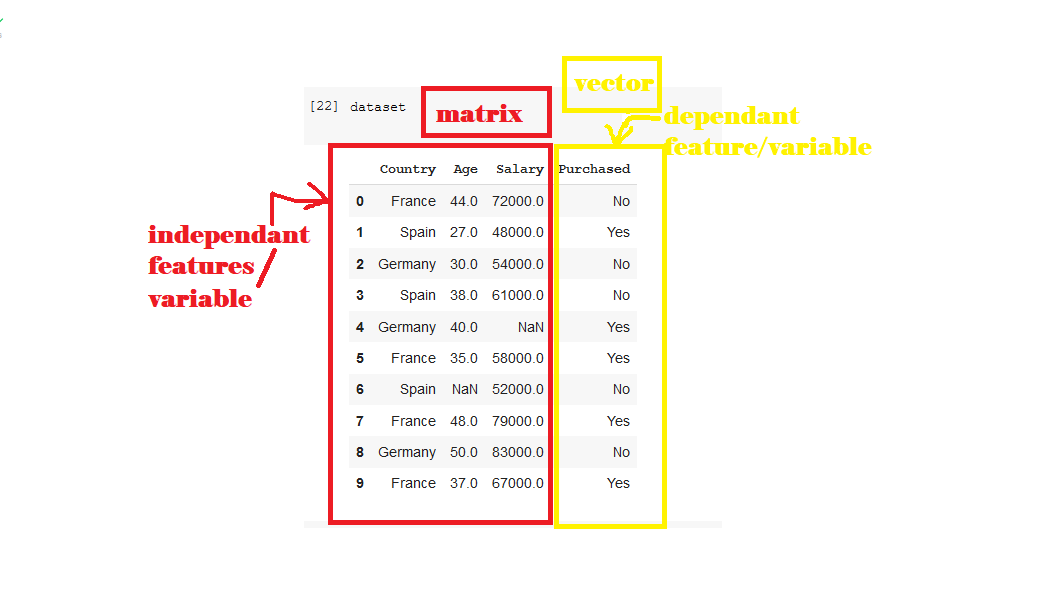

In [ ]:
dataset


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
X

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [ ]:
y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
imputer = imputer.fit(X[:, 1:3])

In [ ]:
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
X=pd.DataFrame(X ,columns=['Country', 'Age','Salary'])

In [ ]:
X

,Country,Age,Salary
0,France,44,72000
1,Spain,27,48000
2,Germany,30,54000
3,Spain,38,61000
4,Germany,40,63777.8
5,France,35,58000
6,Spain,38.7778,52000
7,France,48,79000
8,Germany,50,83000
9,France,37,67000


### **Encoding Categorical Data**

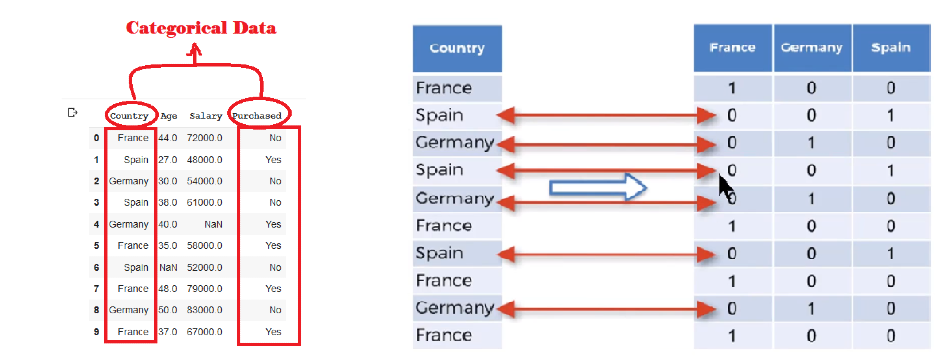

In [ ]:
X=pd.get_dummies(X, columns=["Country"])

In [ ]:
X.head()

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,44,72000,1,0,0
1,27,48000,0,0,1
2,30,54000,0,1,0
3,38,61000,0,0,1
4,40,63777.8,0,1,0


In [ ]:
y=pd.get_dummies(y)

In [ ]:
y.head()

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


### **Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

,Age,Salary,Country_France,Country_Germany,Country_Spain
4,40,63777.8,0,1,0
9,37,67000,1,0,0
1,27,48000,0,0,1
6,38.7778,52000,0,0,1
7,48,79000,1,0,0
3,38,61000,0,0,1
0,44,72000,1,0,0
5,35,58000,1,0,0


### **feature scaling**
- Feature scaling is a method used to normalize the range of independent variables or features of data.

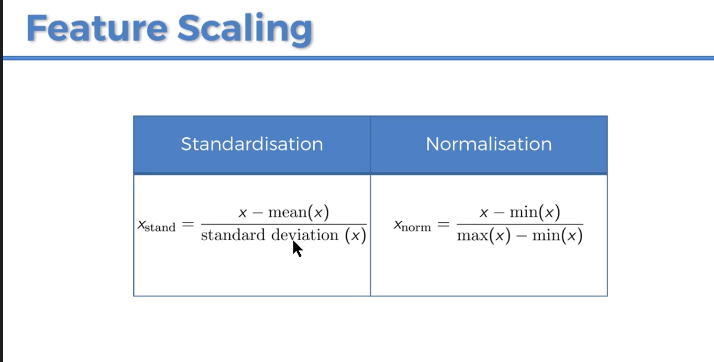

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
X_train =sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [ ]:
X_train

array([[ 0.26306757,  0.12381479, -1.        ,  2.64575131, -0.77459667],
       [-0.25350148,  0.46175632,  1.        , -0.37796447, -0.77459667],
       [-1.97539832, -1.53093341, -1.        , -0.37796447,  1.29099445],
       [ 0.05261351, -1.11141978, -1.        , -0.37796447,  1.29099445],
       [ 1.64058505,  1.7202972 ,  1.        , -0.37796447, -0.77459667],
       [-0.0813118 , -0.16751412, -1.        , -0.37796447,  1.29099445],
       [ 0.95182631,  0.98614835,  1.        , -0.37796447, -0.77459667],
       [-0.59788085, -0.48214934,  1.        , -0.37796447, -0.77459667]])

In [ ]:
y_train =sc_x.fit_transform(y_train)
y_test=sc_x.transform(y_test)

In [ ]:
y_train

array([[-0.77459667,  0.77459667],
       [-0.77459667,  0.77459667],
       [-0.77459667,  0.77459667],
       [ 1.29099445, -1.29099445],
       [-0.77459667,  0.77459667],
       [ 1.29099445, -1.29099445],
       [ 1.29099445, -1.29099445],
       [-0.77459667,  0.77459667]])